## **TANZANIA WATER WELLS PROJECT**

Authors: Winfred Kabuya

Period : May 2023

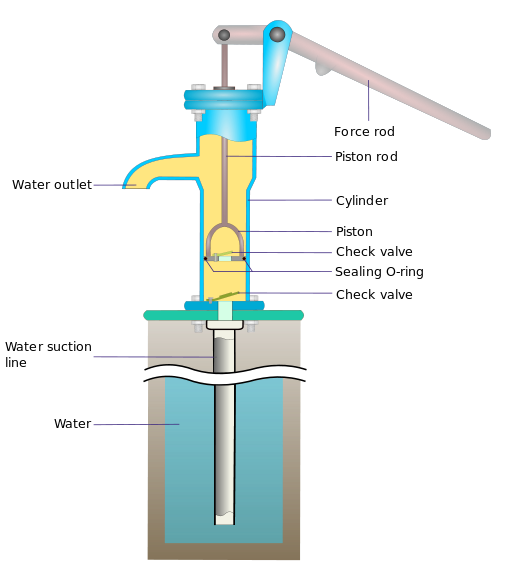


# Introduction

## **Project Overview**

This project aims to develop a classifier that predicts the condition of water wells in Tanzania based on various factors such as the type of pump, installation date, and other relevant information. The target audience for this classifier could be an NGO focused on identifying wells in need of repair or the Government of Tanzania seeking insights to inform future well construction decisions.

## **Business Problem**

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. Almost half the population, lacks access to safe water and do not practice proper sanitation. Which means that they have to spend considerable time and effort to collect water from distant and often unsafe sources like rivers, canals, ponds, hand-dug wells, and natural springs.Despite the challenges, progress has been made in addressing the water crisis.Many water points have already been established in the country, but some are in need of repair while others have failed altogether.

## **Objectives**

The main objectives of the project are as follows:

  - Develop a predictive model to classify the condition of water wells in Tanzania.
  
  - Provide insights into the patterns and factors contributing to non-functional wells.
  
  - Aid NGOs and the Tanzanian government in targeting resources efficiently for well repair and construction initiatives.
  
  - Improve access to clean and safe water for the population of Tanzania.

## **Data Understanding**

The datasets provided by Taarifa and the Tanzanian Ministry of Water, contains information about waterpoints in Tanzania are ;

   - Test set values: The independent variables that need predictions
   - Training set labels: The dependent variable (status_group) for each of the rows in Training set values
   - Training set values: The independent variables for the training set
   
The goal is to predict the operating condition of each waterpoint based on various features. The target variable is the "Status_Group," indicating the current operating condition of the waterpoint. We shall be using datasets from:


The dataset consists of the following features:

   - date_recorded: The date when the data was recorded
   - funder: The organization or entity that funded the well
   - gps_height: The altitude of the well
   - installer: The organization responsible for installing the well
   - longitude: GPS coordinate of the well's location
   - latitude: GPS coordinate of the well's location
   - wpt_name: The name of the waterpoint (if applicable)
   - basin: The geographic water basin where the well is located
   - subvillage: The geographic location of the well (subvillage)
   - region: The geographic location of the well (region)
   - region_code: Coded representation of the geographic region
   - district_code: Coded representation of the district
   - lga: The local government authority responsible for the area
   - ward: The administrative ward where the well is located
   - population: The population size around the well
   - public_meeting: A boolean indicating if there was a public meeting to discuss the waterpoint
   - recorded_by: The group or organization that recorded the data
   - scheme_management: The entity responsible for managing the waterpoint
   - permit: Indicates if the waterpoint has the necessary permits
   - construction_year: The year when the waterpoint was constructed
   - extraction_type: The method used to extract water from the waterpoint
   - management: How the waterpoint is managed
   - payment_type: The type of payment required for accessing the water
   - water_quality: The quality of the water from the waterpoint
   - quantity: The quantity of water available from the waterpoint
   - source_type: The source type of the waterpoint
   - source_class: The source class of the waterpoint
   - waterpoint_type: The type or category of the waterpoint

Before applying a model to the dataset, both the training and testing sets will undergo preprocessing steps to handle missing values, outliers, and inconsistencies. Feature engineering techniques may also be applied to extract additional meaningful insights from the available features.

The ultimate aim is to develop a model that can accurately predict the operating condition of waterpoints, thereby assisting in the efficient allocation of resources for repair, maintenance, and new construction initiatives, leading to improved access to clean and safe water for the population in Tanzania.


## **DATA PREPARATION**

## **Importing Necessary Libraries, Loading & Inspecting Datasets**

## **Loading the dataset**

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Explore the dataset
test_set_values = pd.read_csv('Test set values.csv')
training_set_labels = pd.read_csv('Training Set labels.csv')
training_set_values = pd.read_csv('Training set Values.csv')

In [3]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")



In [4]:
# print the shape of our dataset

print_dataset_shape(test_set_values, training_set_labels, training_set_values)

Dataset 1 - Number of rows: 14850
Dataset 1 - Number of columns: 40
Dataset 2 - Number of rows: 59400
Dataset 2 - Number of columns: 2
Dataset 3 - Number of rows: 59400
Dataset 3 - Number of columns: 40


  - test_set_values represent the independent variables (features) for the test set, where predictions need to be made.
  - training_set_labels represent the dependent variable (status_group) for each row in the training set values. It represents the current operating condition of the waterpoints.
  - training_set_values: Represent the independent variables (features) for the training set, used to train the predictive model.

In [5]:
# Lets view the first rows of our dataframes through a function

def display_dataframe_head(dataframes, num_rows=5):
    for name, df in dataframes.items():
        print(f"Head of DataFrame: {name}")
        print(df.head(num_rows))
        print("\n")

dataframes = {
    "DataFrame 1": test_set_values,
    "DataFrame 2": training_set_labels,
    "DataFrame 3": training_set_values
}

display_dataframe_head(dataframes)


Head of DataFrame: DataFrame 1
      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity

This allows us to get a glimpse of the data in each DataFrame, including the column names and sample values

In [6]:
# Check the summary statistics of the training set values
training_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
# Check the data types and missing values in the training set values
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

Here you can see that the "funder," "installer," "subvillage," "scheme_management," "scheme_name," and "permit" columns have missing values

In [8]:
# Check the distribution of the target variable in the training set labels
training_set_labels['status_group'].value_counts()


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

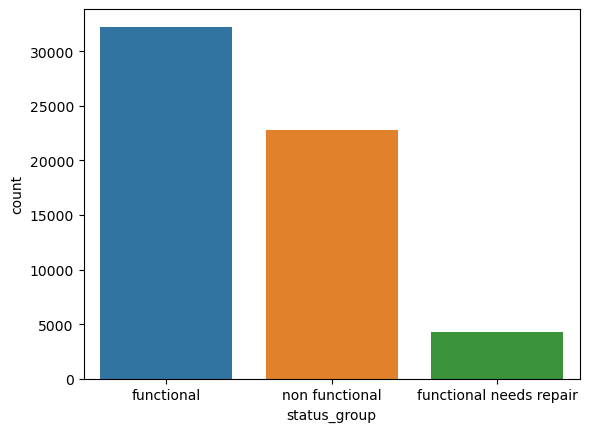

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='status_group', data=training_set_labels)
plt.show()

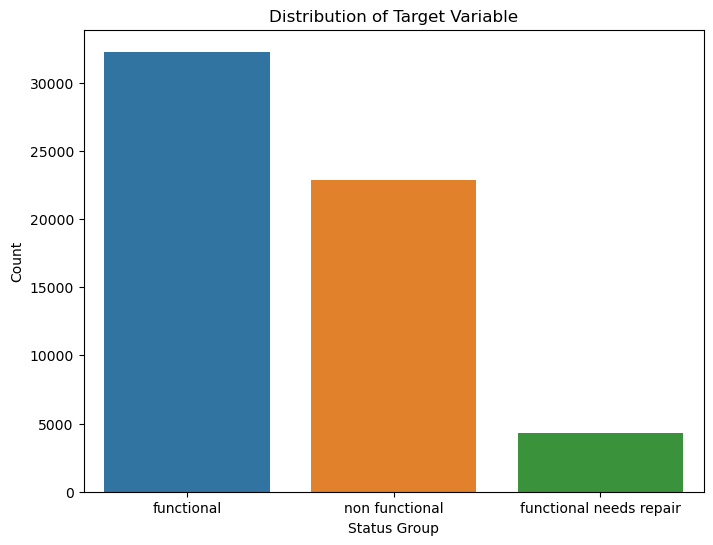

In [10]:
# Merge training set values and training set labels
training_df = pd.merge(training_set_values, training_set_labels, on='id')

# Explore the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status_group', data=training_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.show()

Understanding the distribution of a target variable is important for model evaluation, identifying potential biases, and designing appropriate strategies for addressing imbalances if necessary.

   - The majority of the water pumps are labeled as 'functional' which suggests that a significant portion of the pumps in the dataset are in good working condition.

    - The category 'non-functional' has a considerable number of pumps, although less than the 'functional' ones. This indicates that there is a significant proportion of non-working or non-operational water pumps in the dataset.

    - The category 'functional needs repair' has the lowest count, indicating that there are relatively fewer pumps in the dataset that are functional but require repair.

This provides insights into the prevalence of different pump conditions, which can guide decision-making and resource allocation in addressing water pump functionality issues.